# Model training with Fast.AI toolkit

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
import shutil
import random

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### ResNet50

In [5]:
size = 112
arch = resnet50
batch_size = 32

np.random.seed(42)
random.seed(42)

In [6]:
data = ImageClassifierData.from_paths(
    '/home/lex/kaggle-whale-categorization/data/aug-600x300',
    tfms=tfms_from_model(arch, size),
    test_name='test')

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 244/244 [00:40<00:00,  6.00it/s]


In [8]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▊ | 1020/1150 [00:30<00:03, 33.54it/s, loss=33.4]

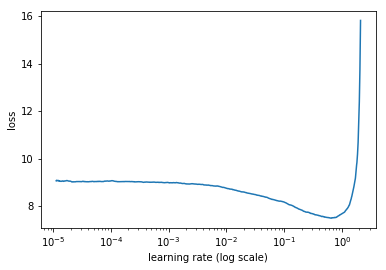

 89%|████████▊ | 1020/1150 [00:50<00:06, 20.38it/s, loss=33.4]

In [9]:
learn.sched.plot()

In [10]:
lr = 0.1

In [11]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

 19%|█▉        | 216/1150 [00:09<00:42, 21.92it/s, loss=8]   

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      5.07823 5.9572  0.1557 ]                             
[1.      2.75319 4.68871 0.30296]                             
[2.      1.61484 4.4451  0.3724 ]                             
[3.      1.87441 4.49401 0.37497]                             
[4.      1.22722 4.4203  0.42323]                             
[5.      0.79424 4.4572  0.4552 ]                              
[6.      0.6023  4.46232 0.45611]                              
[7.      1.21207 4.50308 0.4335 ]                             
[8.      1.05346 4.51997 0.44084]                              
[9.      0.77505 4.68635 0.45282]                              
[10.       0.57626  4.67453  0.47314]                          
[11.       0.44327  4.71708  0.47859]                          
[12.       0.383    4.67885  0.49544]                          
[13.       0.30987  4.76384  0.49472]                          
[14.       0.29038  4.73692  0.49279]                          



In [12]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [13]:
accuracy(probs, y)

0.4934479054779807

In [14]:
log_test_preds, y = learn.TTA(is_test=True)

In [17]:
probs = np.mean(np.exp(log_test_preds), 0)

In [18]:
top_elems = np.argsort(probs, axis=1)[:,-5:]

In [43]:
probs[0][top_elems[0]]

array([0.04783, 0.05344, 0.05974, 0.14112, 0.17004], dtype=float32)

In [23]:
rows = []

for count, filename in enumerate(data.test_ds.fnames):
    pred_classes = [data.classes[elem] for elem in top_elems[count]]
    filename = filename.split('/')[-1]
    rows.append({'Image': filename, 'Id': ' '.join(pred_classes)})

In [36]:
test_df = pd.DataFrame(rows, columns=['Image','Id'])

In [37]:
test_df.head()

,Image,Id
0,d7531cbd.jpg,w_43be268 w_44cccf6 w_372ae75 new_whale w_18eee6e
1,00f8a2e9.jpg,w_d89b29e w_ccfdb00 w_9db9ef5 w_29d2cec new_whale
2,1f0423a1.jpg,w_7c6ad05 w_637f363 w_8596faf w_38f39ed w_47d2bc6
3,03c6c2eb.jpg,w_147b62b w_8867074 w_d89b29e w_a59905f w_9cb529f
4,7c2fd440.jpg,new_whale w_7185713 w_3076d8c w_44f0fa2 w_b7d5069


In [38]:
test_df.to_csv('data/submissions/resnet50_112.csv.gz', index=False, compression='gzip')

In [39]:
from IPython.display import FileLink

In [40]:
FileLink('data/submissions/resnet50_112.csv.gz')

/home/lex/kaggle-whale-categorization/data/submissions/resnet50_112.csv.gz

That scored 0.11224 - nowhere near the benchmark. Let's try a bigger model before abandoning this approach.

### ResNext101

In [46]:
arch = resnext101
size = 112
batch_size = 32

In [47]:
data = ImageClassifierData.from_paths(
    '/home/lex/kaggle-whale-categorization/data/aug-600x300', tfms=tfms_from_model(arch, size), test_name='test')

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

  8%|▊         | 95/1150 [01:08<12:37,  1.39it/s]

In [32]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|████████▉ | 1019/1137 [00:30<00:03, 33.94it/s, loss=31.6]

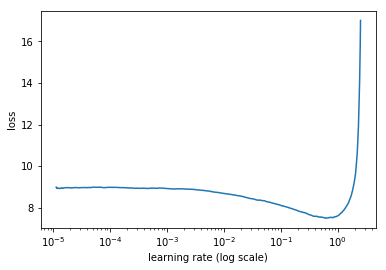

In [33]:
learn.sched.plot()

In [34]:
lr = 0.1

In [35]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

  6%|▋         | 73/1137 [00:01<00:25, 42.48it/s, loss=8.87]

Exception in thread Thread-67:
Traceback (most recent call last):
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      5.10461 6.21683 0.13069]                             
[1.      2.75886 4.83756 0.29485]                             
[2.      1.52162 4.63293 0.35884]                             
[3.      1.86435 4.54514 0.37457]                             
[4.      1.23947 4.45383 0.41983]                             
[5.      0.75446 4.53127 0.4493 ]                              
[6.      0.53939 4.53882 0.4528 ]                              
[7.      1.15965 4.56618 0.42049]                             
[8.      0.89802 4.57852 0.43928]                              
[9.      0.73205 4.61442 0.46086]                              
[10.       0.54217  4.74394  0.47063]                          
[11.       0.43232  4.78978  0.47797]                          
[12.       0.31898  4.78018  0.48951]                          
[13.       0.26003  4.79183  0.4894 ]                          
[14.       0.24512  4.80931  0.49266]                          



In [36]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [37]:
accuracy(probs, y)

0.4938823529411765

Seems about the same. Will look into Siamese Networks next.